# Does Body Fat % or Weight Impact How People Perform Basic Exercise?

The aim of this study was to examine potential trends between age, height, weight, and body fat. Additionally, this study aims to shed light to whether these variables might affect an individual's gripforce and their ability performs basic exercises. Current stereotypes suggest that a higher body fat percentage and weight tend to lead to individuals performing “poorer” in physical exercise. This study aims to challenge that stereotype by looking into data containing all these variables and examining any potential trends. Furthermore, this study can also be used to unravel any potential trends between age, height, weight, body fat percentage, and heart rates. 

The hypothesis for this study is that there will be a high degree of positive correlation between variables such as weight and body fat percentage, age and body fat percentage, as well as height and broad jump. Further hypotheses for this study include a high degree of negative correlation between age and distance of bending, age and sit ups, age and grip force, age and broad jump, as well as age and heart rate. Finally, this studys' hypotheses will also include that there will be no correlation between weight and grip force, weight and bending, weight and sit ups, as well as weight and broad jumps. 

## Importing Data

In [1]:
import pandas as pd
import numpy as np
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
df_all = pd.read_csv('/Users/guptaj/Documents/Personal Projects/bodyPerformance.csv')
df_all

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


## Data Cleaning

In [3]:
#Checking for any missing data
df_all.isna().any()

age                        False
gender                     False
height_cm                  False
weight_kg                  False
body fat_%                 False
diastolic                  False
systolic                   False
gripForce                  False
sit and bend forward_cm    False
sit-ups counts             False
broad jump_cm              False
class                      False
dtype: bool

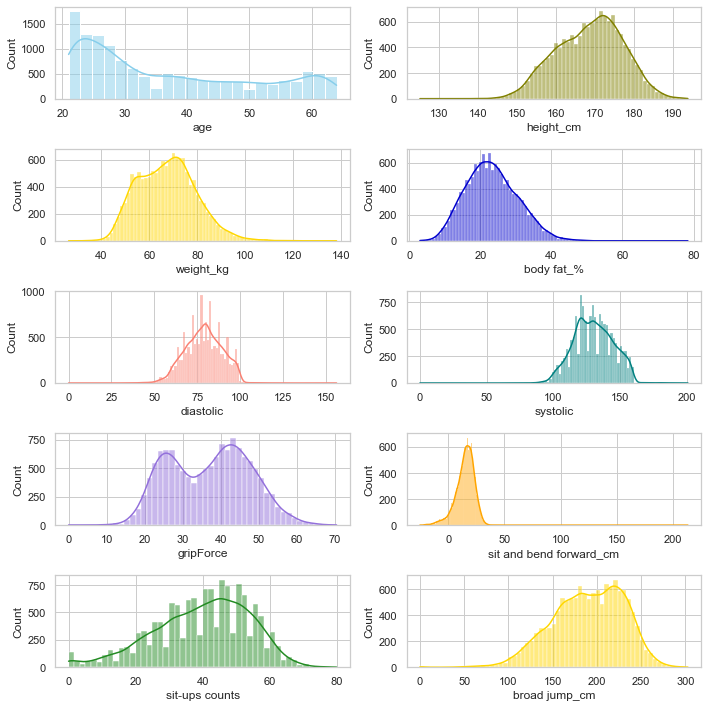

In [4]:
#Viewing Distributions of Data
sns.set(style="whitegrid")  
fig,axs = plt.subplots(5,2, figsize = (10,10))
sns.histplot(data=df_all, x="age", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df_all, x="height_cm", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df_all, x="weight_kg", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df_all, x="body fat_%", kde=True, color="mediumblue", ax=axs[1, 1])
sns.histplot(data=df_all, x="diastolic", kde=True, color="salmon", ax=axs[2, 0])
sns.histplot(data=df_all, x="systolic", kde=True, color="teal", ax=axs[2, 1])
sns.histplot(data=df_all, x="gripForce", kde=True, color="mediumpurple", ax=axs[3, 0])
sns.histplot(data=df_all, x="sit and bend forward_cm", kde=True, color="orange", ax=axs[3, 1])
sns.histplot(data=df_all, x="sit-ups counts", kde=True, color="forestgreen", ax=axs[4, 0])
sns.histplot(data=df_all, x="broad jump_cm", kde=True, color="gold", ax=axs[4, 1])
fig.tight_layout()

We see that sit and bend forward has some negative values. While it is not entirely clear how these measurements were taken, I will take the assumption that a negative value is not possible. So I will only keep rows where that value is positive. 

In [5]:
#Removing negative values for sit and bend foward
df = df_all[df_all["sit and bend forward_cm"]>=0]
df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


## Data Exploration

In [6]:
#Standardizing Numerical Data
from sklearn.preprocessing import StandardScaler
allCols = ["age","height_cm","weight_kg","body fat_%","diastolic","systolic","gripForce","sit and bend forward_cm","sit-ups counts","broad jump_cm"]
all_arr = df.loc[:,allCols].values

std_all_arr = StandardScaler().fit_transform(all_arr)

### Correlation Matrix

From the below correlation matrix, we can make the following conclusions:
- height and weight are positively correlated (correlation coefficient = 0.74)
- height and grip force are positively correlated (correlation coefficient = 0.74)
- weight and grip force are positively correlated (correlation coefficient = 0.72)
- grip force and broad jump are positively correlated (correlation coefficient = 0.75)
- sit-ups and broad jump are positively correlated (correlation coefficient = 0.75) 

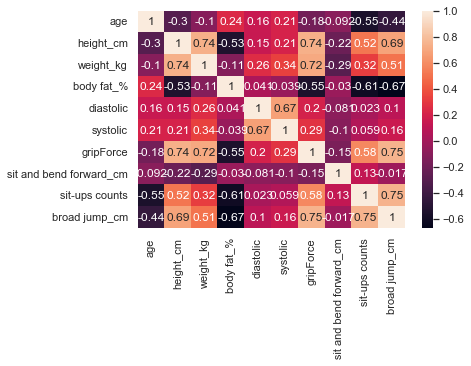

In [7]:
#Constructing Correlation Matrix
numdf = pd.DataFrame(all_arr, columns = allCols)
corr_matrix = numdf.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

### Principal Component Analysis

Next, we use principal component analysis to compress the variation in the body performance dataset and examine trends amongst the variables. 

From the below plot giving eigenvalues for each principal component, we can conclude that we can use approximately 3 principle components in the principal component analysis since they are both well above the Kaiser-Guttman red line. 

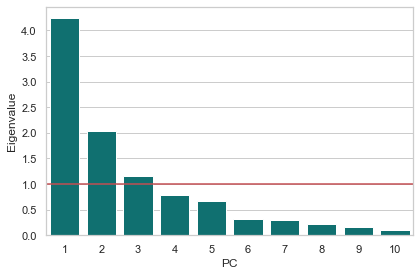

In [8]:
from sklearn.decomposition import PCA
#Figuring Out How Many Principal Components We Should Use
pca = PCA(n_components=None)
pca.fit(std_all_arr)
eigenval = pca.explained_variance_
PC = range(1,11)
PC_eigen = pd.DataFrame({'PC':PC, 'Eigenvalue': eigenval})
sns.barplot(PC_eigen, x="PC",y="Eigenvalue",color = "teal")

plt.axhline(y=1, color='r')#Kaiser Guttman Line
plt.tight_layout()


In [9]:
#Principal Componenet Analysis with 3 Components 
pca = PCA(n_components=3)
PC = pca.fit_transform(std_all_arr)
PC_Df = pd.DataFrame(data = PC, columns = ['PC1', 'PC2','PC3'])
obs = range(1,len(PC_Df)+1)

We can clearly see from the axes of the graphs that there is more variation around principal components 1 and 2 then there is in 3. 

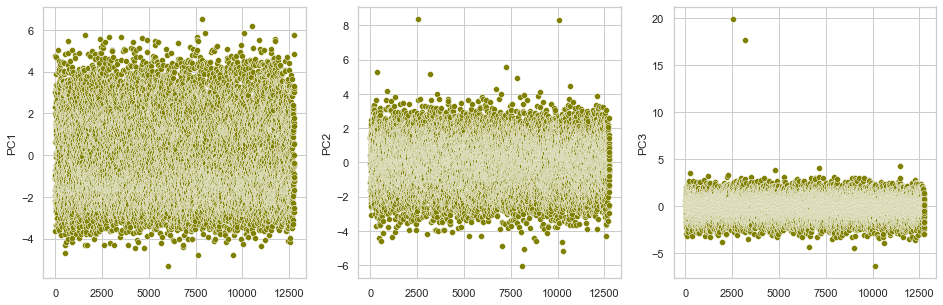

In [10]:
#Plotting observations with each principal compnent
sns.set(style="whitegrid")  
fig,axs = plt.subplots(1,3, figsize = (16,5))
sns.scatterplot(data=PC_Df,x = obs,y = PC_Df.loc[:,"PC1"], color = "olive",ax=axs[0])
sns.scatterplot(data=PC_Df,x = obs,y = PC_Df.loc[:,"PC2"], color = "olive",ax=axs[1])
sns.scatterplot(data=PC_Df,x = obs,y = PC_Df.loc[:,"PC3"], color = "olive",ax=axs[2])

In [11]:
#Loadings
loadings = pca.components_.T
loadings_df = pd.DataFrame({'Variable': range(1,11),'PC1': loadings[:,0],'PC2':loadings[:,1],'PC3':loadings[:,2]})

In [12]:
#Adding Variable Names to Loadings Dataframe
loadings_df['Variable Names'] = allCols
display(loadings_df)

,Variable,PC1,PC2,PC3,Variable Names
0,1,0.204876,-0.394983,-0.040397,age
1,2,-0.420785,-0.058115,-0.211631,height_cm
2,3,-0.343210,-0.276949,-0.305938,weight_kg
3,4,0.330186,-0.225984,-0.150631,body fat_%
4,5,-0.106551,-0.516105,0.410603,diastolic
5,6,-0.143548,-0.531697,0.366425,systolic
6,7,-0.430404,-0.093199,-0.080373,gripForce
7,8,0.064033,0.268850,0.687249,sit and bend forward_cm
8,9,-0.377483,0.258755,0.222414,sit-ups counts
9,10,-0.436291,0.125913,0.078690,broad jump_cm


We can see from the loadings plot below, how much each variable is contributing to pricinpal component 1, 2, and 3. For principal component 1 for example, height and the results of basic excersies is contributing most, namely grip force and broad jump. They are all also negatively correlated with the principal component. For principal component 2, systolic and diastolic blood pressure contribute the most. For principal component 3, the measurements for sitting and bending forward contribute the most.

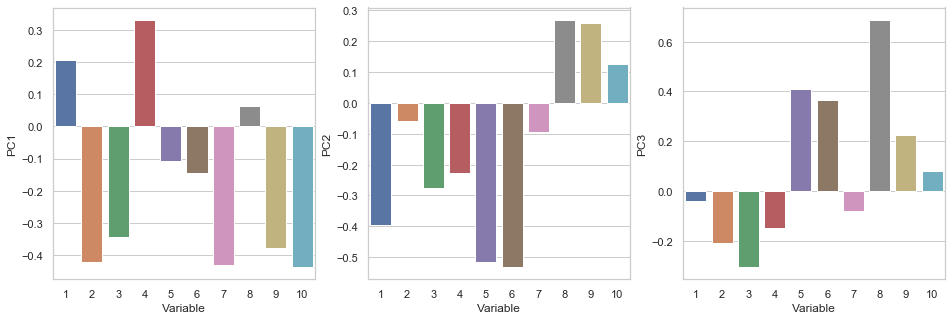

In [13]:
fig,axs = plt.subplots(1,3, figsize = (16,5))
sns.barplot(data=loadings_df, x = "Variable", y ="PC1", ax=axs[0])
sns.barplot(data=loadings_df, x = "Variable", y ="PC2", ax=axs[1])
sns.barplot(data=loadings_df, x = "Variable", y ="PC3", ax=axs[2])

### K Means Clustering

Next we use K Means clustering to unravel any potential groupings in our data. 

In [17]:
from sklearn.cluster import KMeans

To determine the optimal number of clusters, we calculate within-cluster sum of squares (wcss) for an increasing number of clusters. We can see from the plot below that about 3 clusters is sufficient for this data. 

In [18]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = "k-means++", random_state = 42)
    kmeans.fit(PC)
    wcss.append(kmeans.inertia_)

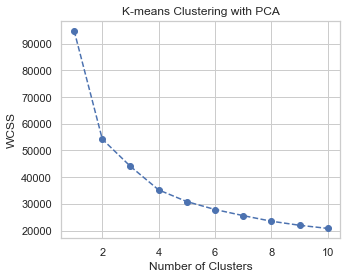

In [19]:
wcss_df = pd.DataFrame({"WCSS":wcss,"Cluster Number": range(1,11)})
plt.figure(figsize = (5,4))
plt.plot(range(1,11),wcss,marker = 'o', linestyle = '--')
plt.xlabel("Number of Clusters")
plt.ylabel('WCSS')
plt.title('K-means Clustering with PCA')
plt.show()

In [20]:
#Choosing 3 clusters from above plot
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = 42)
kmeans.fit(PC)

KMeans(n_clusters=3, random_state=42)

In [21]:
kmeans_pca_df = pd.concat([numdf.reset_index(drop=True), PC_Df], axis=1)
kmeans_pca_df['Cluster'] = kmeans.labels_
kmeans_pca_df['Segment'] = kmeans_pca_df['Cluster'].map({0:'First',1:'Second',2:'Third'})

In [22]:
kmeans_pca_df

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,PC1,PC2,PC3,Cluster,Segment
0,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,-2.187888,0.438396,0.233549,2,Third
1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,-0.692125,1.458907,0.677463,2,Third
2,31.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,-1.926704,-1.599612,0.205913,1,Second
3,32.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,-1.681374,-0.081267,0.284045,2,Third
4,28.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,-1.153180,1.456427,0.719421,2,Third
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12746,25.0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,-1.073848,0.460596,0.288349,2,Third
12747,21.0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,-1.066995,0.628621,-1.542639,2,Third
12748,39.0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,-2.556762,-0.392282,-0.535561,2,Third
12749,64.0,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,5.767120,-1.316917,-1.696880,0,First


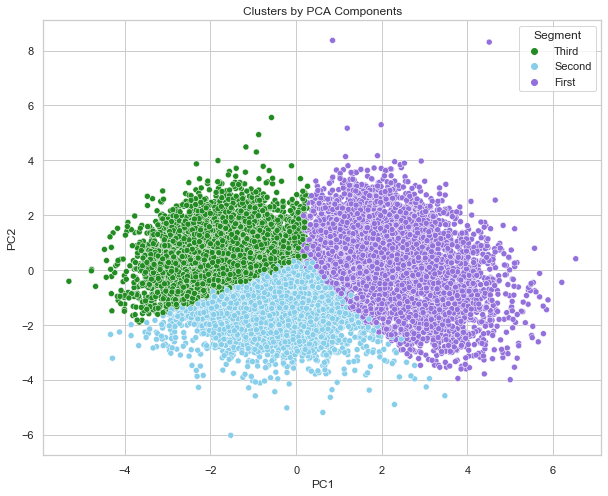

In [23]:
#Plotting Clusters
plt.figure(figsize=(10,8))
sns.scatterplot(data = kmeans_pca_df, x="PC1", y="PC2", hue = kmeans_pca_df['Segment'], palette = ['forestgreen','skyblue','mediumpurple'])
plt.title('Clusters by PCA Components')
plt.show()

We can now analyze the clusters visualized in the plot by looking at individual observations for each cluster in the plot below. We can see that cluster 1 tends to have samples with lower weights, lower grip force, and lower broad jump. We can see that cluster 3 tends to have samples with higher weights, lower body fat %, higher grip force, higher broad jump, and higher sit up counts. 

In [28]:
#Separating data by cluster
c1 = kmeans_pca_df[kmeans_pca_df['Segment']=='First']
c2 = kmeans_pca_df[kmeans_pca_df['Segment']=='Second']
c3 = kmeans_pca_df[kmeans_pca_df['Segment']=='Third']

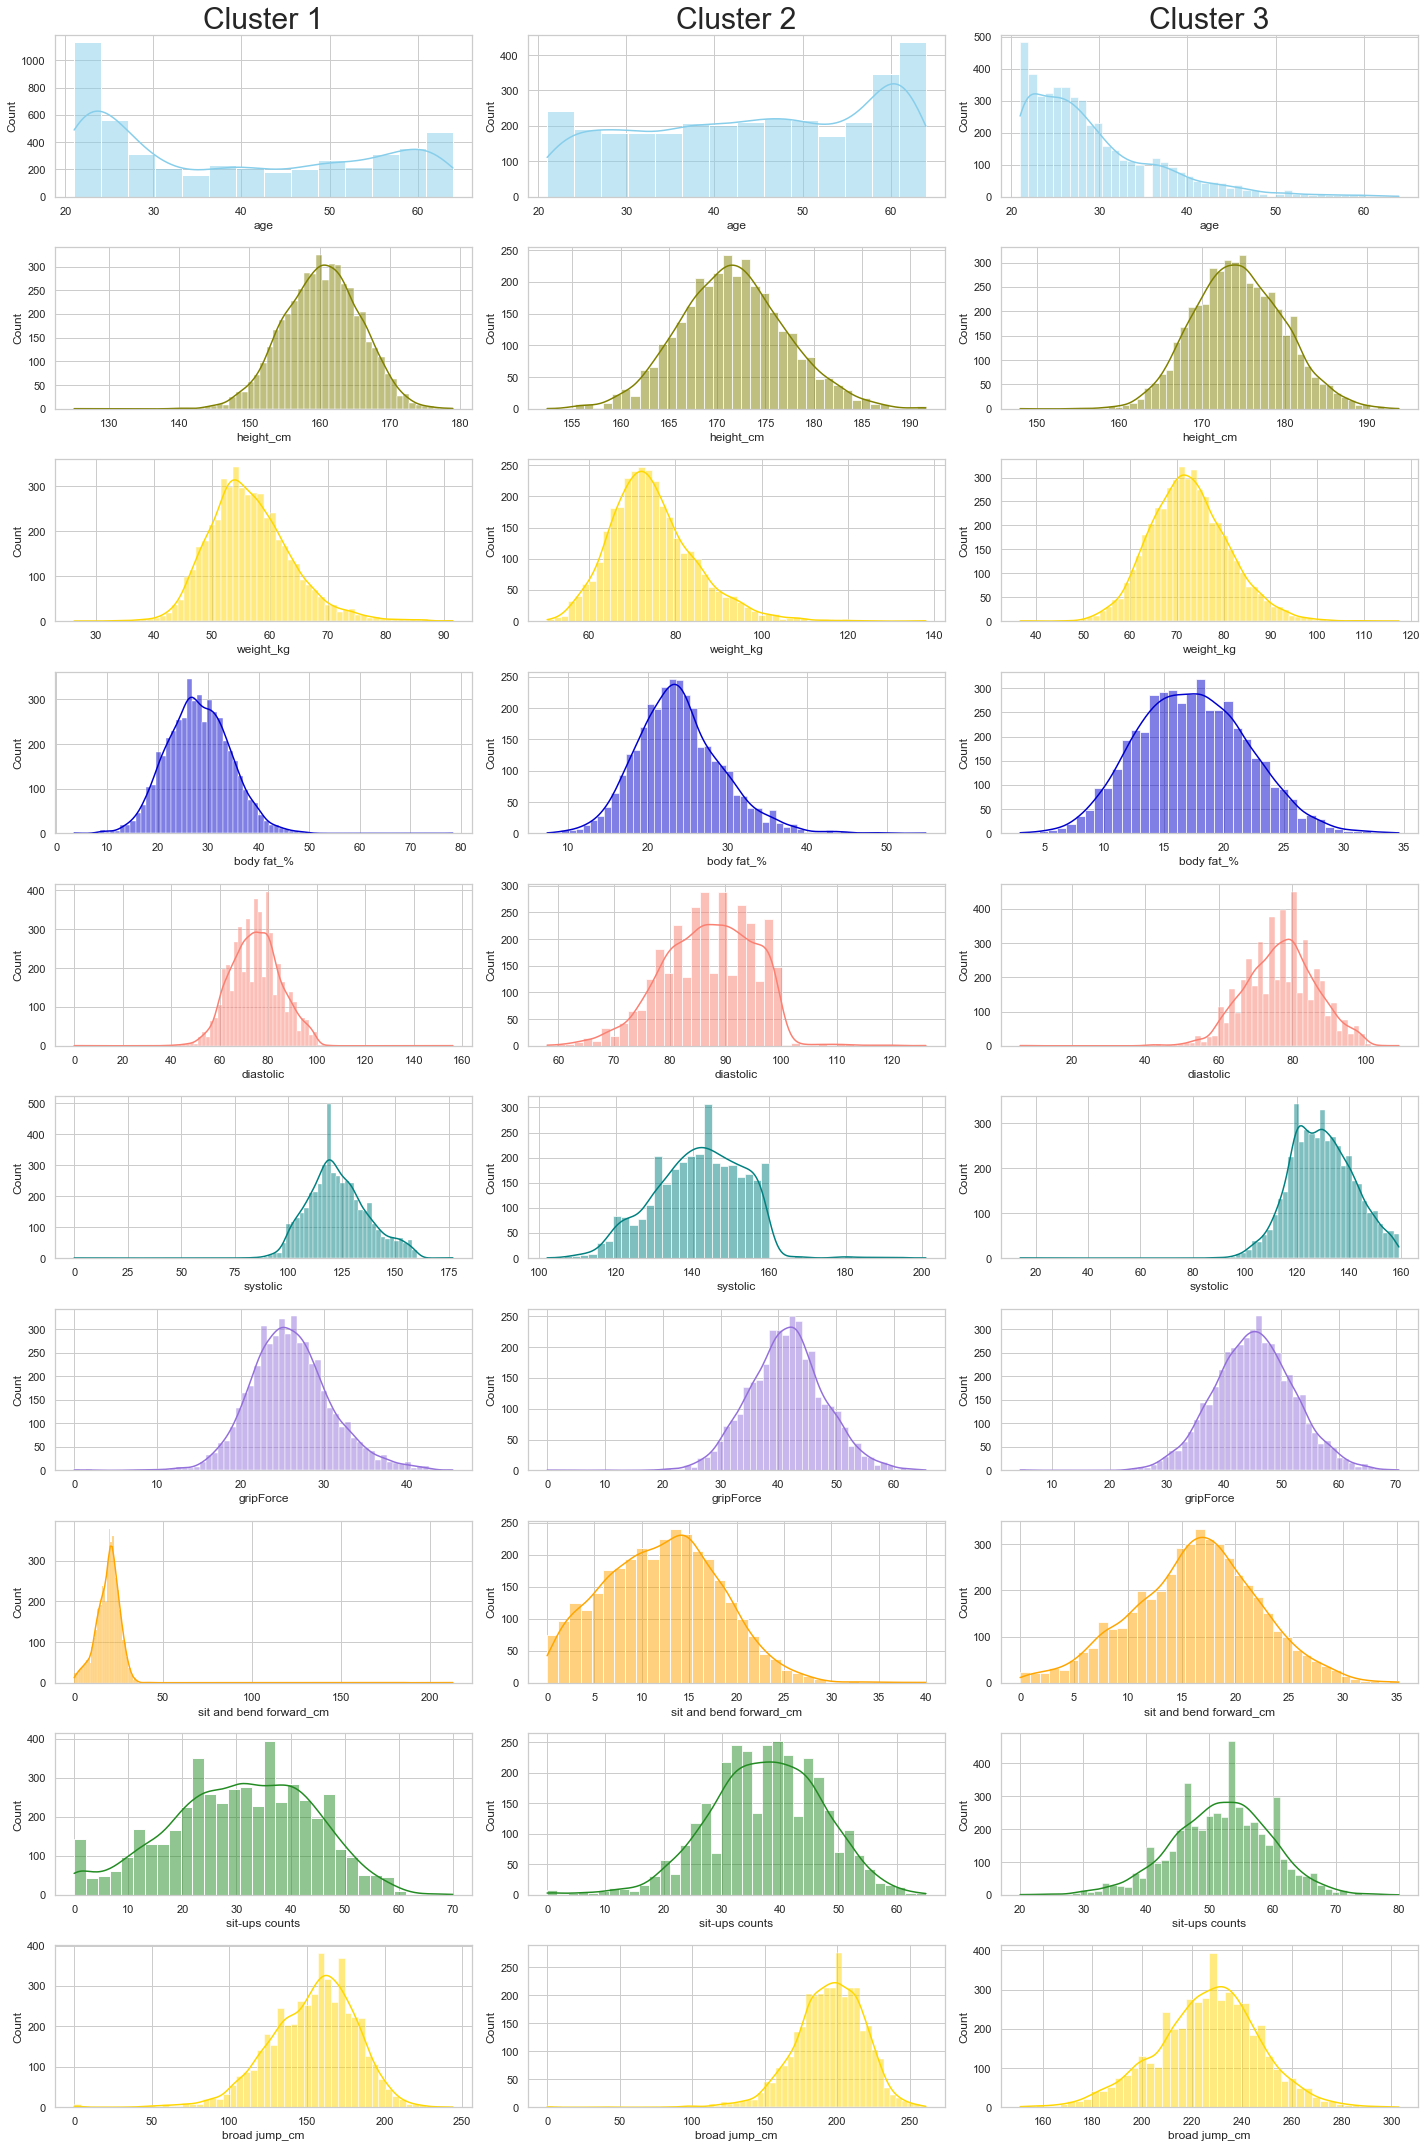

In [33]:
#Viewing Distributions of Data
sns.set(style="whitegrid")  
fig,axs = plt.subplots(10,3, figsize = (20,30))
p1 = sns.histplot(data=c1, x="age", kde=True, color="skyblue", ax=axs[0, 0])
p2 = sns.histplot(data=c2, x="age", kde=True, color="skyblue", ax=axs[0, 1])
p3 = sns.histplot(data=c3, x="age", kde=True, color="skyblue", ax=axs[0, 2])

p4 = sns.histplot(data=c1, x="height_cm", kde=True, color="olive", ax=axs[1, 0])
p5 = sns.histplot(data=c2, x="height_cm", kde=True, color="olive", ax=axs[1, 1])
p6 = sns.histplot(data=c3, x="height_cm", kde=True, color="olive", ax=axs[1, 2])

p7 = sns.histplot(data=c1, x="weight_kg", kde=True, color="gold", ax=axs[2, 0])
p8 = sns.histplot(data=c2, x="weight_kg", kde=True, color="gold", ax=axs[2, 1])
p9 = sns.histplot(data=c3, x="weight_kg", kde=True, color="gold", ax=axs[2, 2])

p10 = sns.histplot(data=c1, x="body fat_%", kde=True, color="mediumblue", ax=axs[3, 0])
p11 = sns.histplot(data=c2, x="body fat_%", kde=True, color="mediumblue", ax=axs[3, 1])
p12 = sns.histplot(data=c3, x="body fat_%", kde=True, color="mediumblue", ax=axs[3, 2])

p13 = sns.histplot(data=c1, x="diastolic", kde=True, color="salmon", ax=axs[4, 0])
p14 = sns.histplot(data=c2, x="diastolic", kde=True, color="salmon", ax=axs[4, 1])
p15 = sns.histplot(data=c3, x="diastolic", kde=True, color="salmon", ax=axs[4, 2])

p16 = sns.histplot(data=c1, x="systolic", kde=True, color="teal", ax=axs[5, 0])
p17 = sns.histplot(data=c2, x="systolic", kde=True, color="teal", ax=axs[5, 1])
p18 = sns.histplot(data=c3, x="systolic", kde=True, color="teal", ax=axs[5, 2])

p19 = sns.histplot(data=c1, x="gripForce", kde=True, color="mediumpurple", ax=axs[6, 0])
p20 = sns.histplot(data=c2, x="gripForce", kde=True, color="mediumpurple", ax=axs[6, 1])
p21 = sns.histplot(data=c3, x="gripForce", kde=True, color="mediumpurple", ax=axs[6, 2])

p22 = sns.histplot(data=c1, x="sit and bend forward_cm", kde=True, color="orange", ax=axs[7, 0])
p23 = sns.histplot(data=c2, x="sit and bend forward_cm", kde=True, color="orange", ax=axs[7, 1])
p24 = sns.histplot(data=c3, x="sit and bend forward_cm", kde=True, color="orange", ax=axs[7, 2])

p25 = sns.histplot(data=c1, x="sit-ups counts", kde=True, color="forestgreen", ax=axs[8, 0])
p26 = sns.histplot(data=c2, x="sit-ups counts", kde=True, color="forestgreen", ax=axs[8, 1])
p27 = sns.histplot(data=c3, x="sit-ups counts", kde=True, color="forestgreen", ax=axs[8, 2])

p28 = sns.histplot(data=c1, x="broad jump_cm", kde=True, color="gold", ax=axs[9, 0])
p29 = sns.histplot(data=c2, x="broad jump_cm", kde=True, color="gold", ax=axs[9, 1])
p30 = sns.histplot(data=c3, x="broad jump_cm", kde=True, color="gold", ax=axs[9, 2])

p1.set_title("Cluster 1", fontsize=30)
p2.set_title("Cluster 2", fontsize=30)
p3.set_title("Cluster 3", fontsize=30)
fig.tight_layout()

The aim of this study was to examine potential trends between age, height, weight, and body fat as well as how those variables might affect how an individual performs basic exercises and their grip force along with challenging stereotypes that weight and body fat percentage are linked to poorer results in basic exercising. The results of this study showed that there is a relatively high degree of positive correlation between height and weight, height and grip force, weight and grip force, grip force and broad jump, as well as sit-ups and broad jumps. There was no high-degree of correlation between weight and body fat percentage and a “poorer” performance, (such as lower values for grip force, sit-ups, etc). Rather, there was a relatively high degree of correlation between weight and grip force. This study also disproved part of the hypothesis, as age did not seem to have a high correlation to any of the other variables. 

In addition to trends between variables, principal component analysis showed which variables lead to the most variability in the dataset against a particular direction, or principal component. The loading plots revealed that height, weight, body fat percentage, grip force, sit ups, and broad jump contributed most to principal component 1, which explains the most amount of variance in the data.

Further clustering analysis revealed how coordinates onto each principle component of the original observations can be clustered and further trends can be extracted from the specific observations. For example, people with higher weights, higher broad jumps, and higher sit up counts were all were clustered together. Overall however, the study, while not proving the specifics of the hypothesis, support the aim of the study, which was to provide evidence against stereotypes that suggest those with higher weights and higher body fat percentages perform poorer in basic exercises. 